## Data quality check / cleaning / preparation 

### Data quality check
*By Lila Wells*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [6]:
# Loading relevant libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import statsmodels.formula.api as sm


# Loading the data
data = pd.read_csv("dataset_diabetes/diabetic_data.csv")
ID = pd.read_csv('dataset_diabetes/IDs_mapping.csv')

In [7]:
#...Distribution of continuous variables...#

# num_lab_procedures (continuous variable)
data.num_lab_procedures.isnull().sum() # No missing values
data.num_lab_procedures.describe() # count = 101766.000000, mean = 43.095641, std = 19.674362, min = 1.000000, 25% = 31.000000, 50% = 44.000000, 75% = 57.000000, max = 132.000000

# num_procedures (continuous variable)
data.num_procedures.isnull().sum() # No missing values
data.num_procedures.describe() # count = 101766.000000, mean = 1.339730, std = 1.705807, min = 0.000000, 25% = 0.000000, 50% = 1.000000, 75% = 2.000000, max = 6.000000

# num_medications (continuous variable)
data.num_medications.isnull().sum() # No missing values
data.num_procedures.describe() # count = 101766.000000, mean = 1.339730, std = 1.705807, min = 0.000000, 25% = 0.000000, 50% = 1.000000, 75% = 2.000000, max = 6.000000

# number_outpatient (continuous variable)
data.number_outpatient.isnull().sum() # No missing values
data.number_outpatient.describe() # count = 101766.000000, mean = 0.369357, std = 1.267265, min = 0.000000, 25% = 0.000000, 50% = 0.000000, 75% = 0.000000, max = 42.000000

# number_emergency (continuous variable)
data.number_emergency.isnull().sum() # No missing values
data.number_emergency.describe() # count = 101766.000000, mean = 0.197836, std = 0.930472, min = 0.000000, 25% = 0.000000, 50% = 0.000000, 75% = 0.000000, max = 76.000000

# number_inpatient (continous variable)
data.number_inpatient.isnull().sum() # No missing values
data.number_inpatient.describe() # count = 101766.000000, mean = 0.635566, std = 1.262863, min = 0.000000, 25% = 0.000000, 50% = 0.000000, 75% = 1.000000, max = 21.000000

# number_diagnoses (continuous variable)
data.number_diagnoses.isnull().sum() # No missing values
data.number_diagnoses.describe() # count = 101766.000000, mean = 7.422607, std = 1.933600, min = 1.000000, 25% = 6.000000, 50% = 8.000000, 75% = 9.000000, max = 16.000000

# age (continuous variable)
data.age.isnull().sum() # No missing values
data.age.describe() # count = 101766, unique = 10, top = [70-80), freq = 26068

# time_in_hospital (continuous variable)
data.time_in_hospital.isnull().sum() # No missing values
data.time_in_hospital.describe() # count = 101766, mean = 4.395987, std = 2.985108, min = 1.000000, 25% = 2.000000, 50% = 4.000000, 75% = 6.000000, max = 14.000000

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

In [8]:
#...Distribution of categorical variables...#

# Change (categorical variable)
data.change.value_counts() # No : 54755, Ch : 47011
data.change.isnull().sum() # No missing values 

# diabetesMed (categorical variable)
data.diabetesMed.value_counts() # Yes : 78363, No : 23403
data.diabetesMed.isnull().sum() # No missing values 

# diag_1 (categorical_variable)
data.diag_1.value_counts() # 717 levels here 
data.diag_1.isnull().sum() # No missing values 

# diag_2 (categorical variable)
data.diag_2.value_counts() # 749 levels here
data.diag_2.isnull().sum() # No missing values 

# admission_source_id (categorical variable)
data.admission_source_id.value_counts() # 17 levels here
data.admission_source_id.isnull().sum() # No missing values 

# discharge_disposition_id (categorical variable)
data.discharge_disposition_id.value_counts() # 26 levels here
data.discharge_disposition_id.isnull().sum() # No missing values 

# admission_type_id (categorical variable)
data.admission_type_id.value_counts() # {1 : 53990, 3 : 18869, 2 : 18480, 6 : 5291, 5 : 4785, 8 : 320, 7 : 21, 4 : 10}
data.admission_type_id.isnull().sum() # No missing values 

0

/var/folders/25/jjvj1r3d1lj4q97f1twwhgkm0000gn/T/ipykernel_4118/3545912699.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr())


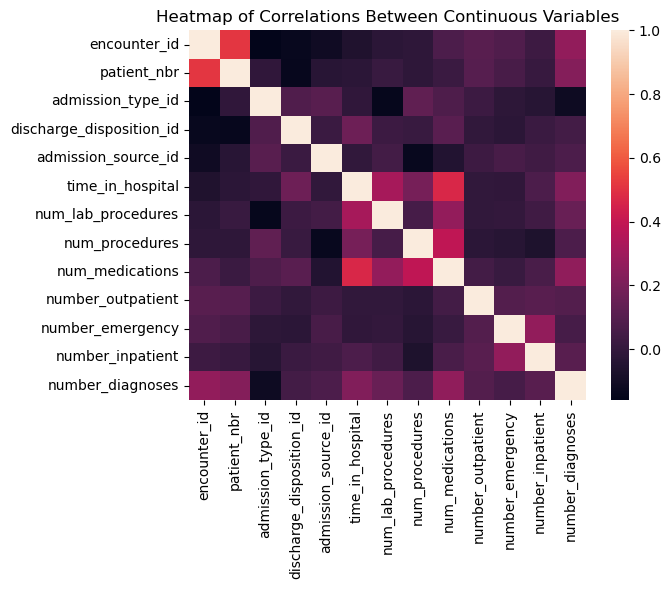

In [9]:
#...Association of the response with the predictors...#

# Creating a heatmap to visualize the association between the response and predictors
sns.heatmap(data=data.corr())
plt.title('Heatmap of Correlations Between Continuous Variables')
plt.savefig("heatmap_continuous.png", dpi=300)


### Data Cleaning
*By Anastasia Wei*

From the data quality check we realized that:

1. Two predictors, `weight`, and `medical specialty` have more than 50% missing values. We don't think it's reasonable to input the values as we do not know the underlying distributions of these two variables. Therefore, we decided to remove these two variables.

2. The predictor `race` is missing 2% of its values, so we imputed it by randomly sampling the distribution of race in the remaining observations. 

The code below implements the above cleaning.

In [10]:
######-----------Changing the IDs into a three column format------------#########
IDs = pd.DataFrame(index = range(63), columns = ['ID_types', 'ID_num', 'Description'])

IDs.loc[:8, 'ID_types'] = ['admission_type_id'] * 9
IDs.loc[:8, 'ID_num'] = ID.loc[:8,'admission_type_id'].values
IDs.loc[:8, 'Description'] = ID.loc[:8,'description'].values

IDs.loc[8:38, 'ID_types'] = ['discharge_disposition_id'] * 31
IDs.loc[8:38, 'ID_num'] = ID.loc[10:40,'admission_type_id'].values
IDs.loc[8:38, 'Description'] = ID.loc[10:40,'description'].values

IDs.loc[38:, 'ID_types'] = ['admission_source_id'] * 25
IDs.loc[38:, 'ID_num'] = ID.loc[42:,'admission_type_id'].values
IDs.loc[38:, 'Description'] = ID.loc[42:,'description'].values

# Saving the cleaned IDs to a new csv file
IDs.to_csv('IDs_clean.csv')

######-----------Dropping the columns w/ more than 50% values missing------------#########
data.drop(['weight','medical_specialty'], axis = 1, inplace = True)

######-----------Removing duplicate records for the same patient------------#########
print('Length before removing Duplicates:', len(data))
data.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(data))

######-----------Changing readmission to two levels instead of three------------#########

# Checking the values of the readmitted column and changing it to two levels
# Readmitted is defined here as '1' if the patient returns to hospital within 30 days
data.readmitted.value_counts()
data['readmitted'] = data['readmitted'].apply(lambda x: 0 if x == 'NO' or x == '>30'
                                              else 1)

######-----------Imputing Missing Values in Race by drawing randomly from the race in the observations------------#########

# Checking the value counts of race and where values are missing 
races = data['race'].loc[data['race'] != '?'].values
data['race'].value_counts()

# Applying a lambda function to the race column to impute missing values 
data['race'] = data['race'].apply(lambda x: random.choice(races) if x == '?' else x)
data['race'].value_counts()

# Re-indexing
data.index = np.arange(0,len(data))


Length before removing Duplicates: 101766
Length after removing Duplicates: 71518


### Data preparation
*By Anastasia Wei*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Changed each age interval to the middle of the interval
2. Used domain knowledge about the diagnosis mapping to futher bin the `diag1`, `diag2`, and `diag3` predictors. 
3. Performed mapping on variables `admission_type_id`, `admission_source_id`, and `discharge_disposition_id.` Changing each from 8, 30, 25 distinct levels to 4, 6, and 8 distinct levels.
4. Created a new variable `num_of_changes` to aggregate the number of changes in medications per patient.
5. Changed `readmission`, the response variable, from 3 levels (No, >30, <30) to 2 levels (0,1) for readmitted and admitted
6. Split the data into train set and test sets. We randomly sampled 80% of the data to be the train set and used the rest as the test data set.

In [11]:
######-----------Replacing the age range with the middle of the interval------------#########
replaceDict = {'[0-10)' : 5,'[10-20)' : 15, '[20-30)' : 25, 
               '[30-40)' : 35,'[40-50)' : 45,'[50-60)' : 55,
               '[60-70)' : 65,'[70-80)' : 75,'[80-90)' : 85,
               '[90-100)' : 95}

data['age'] = data['age'].apply(lambda x : replaceDict[x])
print(data['age'].head())

######-----------Using domain knowledge on diag_1, diag_2, and diag_3 to bin the diagnoses------------#########

# Defining a helper function to determine if a number is a float
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

# Defining a function to bin the diagnoses columns
def diag_transform(x):
    if str(x)[0] == 'V' or str(x)[0] == 'E':
        return 'other'
    elif isfloat(x):
        if int(float(x)) in range(390, 460) or int(float(x)) == 785:
            return 'circulatory'
        elif int(float(x)) in range(460, 520) or int(float(x)) == 786:
            return 'respiratory'
        elif int(float(x)) in range(520, 580) or int(float(x)) == 787:
            return 'digestive'
        elif int(float(x)) == 250:
            return'diabetes'
        elif int(float(x)) in range(800, 1000):
            return 'injury'
        elif int(float(x)) in range(710, 740):
            return 'musculoskeletal'
        elif int(float(x)) in range(580, 630) or int(float(x)) == 788:
            return 'genitourinary'
        elif int(float(x)) in range(140, 240):
            return 'neoplasms'
        elif int(float(x)) in range(630, 680):
            return 'pregnecy'
        else:
            return 'other'
    else:
        return 'other'

# Applying the functions to the appropriate columns in the dataframe 
data['diag_1'] = data['diag_1'].apply(diag_transform)
data['diag_2'] = data['diag_2'].apply(diag_transform)
data['diag_3'] = data['diag_3'].apply(diag_transform)

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


In [12]:
######-----------Using domain knowledge to bin admission_type_id, discharge_disposition_id, admission_source_id------------#########

# Changing the datatypes of the appropriate columns 
data['admission_type_id'] = data['admission_type_id'].astype('int')
data['admission_source_id'] = data['admission_source_id'].astype('int')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('int')

# Defining helper functions to transform the data 
def ad_type_transform(x):
    if x in [2,7]:
        return 1
    elif x in [6,8]:
        return 5
    else:
        return x
    
def ad_source_transform(x):
    if x in [2,3]:
        return 1
    elif x in [5,6,10,22,25]:
        return 4
    elif x in [15,17,20,21]:
        return 9
    elif x in [13,14]:
        return 11
    else:
        return x
    
def discharge_transform(x):
    if x in [6, 8, 9, 13]:
        return 1
    elif x in [3, 4, 5, 14, 22, 23, 24]:
        return 2
    elif x in [12, 15, 16, 17]:
        return 10
    elif x in [19, 20, 21]:
        return 11
    elif x in [25, 26]:
        return 18
    elif x in [13,14,19,20,21]:
        return 11
    else:
        return x

    
# Applying the helper functions to the appropriate columns
data['admission_type_id'] = data['admission_type_id'].apply(ad_type_transform)
data['admission_source_id'] = data['admission_source_id'].apply(ad_source_transform)
data['discharge_disposition_id'] = data['discharge_disposition_id'].apply(discharge_transform)

In [13]:
######-----Creating number of changes variable (number of 'ups' and 'downs' in medication)-------#########

# Creating a list of the drugs in the dataset
druglist = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide',
            'glimepiride','acetohexamide', 'glipizide', 'glyburide', 
            'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 
            'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 
            'insulin', 'glyburide-metformin', 'glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone',
            'metformin-pioglitazone']

# Defining a helper function to help create this variable 
num_of_changes = []
for i in tqdm(range(len(data))) :
    changeCount = 0
    for col in druglist : 
        if data.iloc[i][col] in ['Down', 'Up'] :
            changeCount += 1
    num_of_changes.append(changeCount)
    
# Creating the variable in the dataset
data['num_of_changes'] = num_of_changes

100%|████████████████████████████████████| 71518/71518 [02:34<00:00, 461.48it/s]


In [14]:
######-----Saving the cleaned data as a CSV-------#########
data.to_csv('diabetes_cleaned.csv')

######-----Creating test and train datasets-------#########

# Using 80% for train, 20% for test
print(len(data))
print(len(data)*0.2)

# Creating the test data
pop = list(np.arange(0,71518))
test_loc = random.sample(pop, k = 14304)
test = data.iloc[test_loc]
test.index = np.arange(0, 14304)

# Creating the train data 
train_loc = list(set(pop) - set(test_loc))
train = data.iloc[train_loc]
train.index = np.arange(0, 57214)

# Saving both dfs as CSVs
test.to_csv('test.csv')
train.to_csv('train.csv')

71518
14303.6


#### Addressing Response Imbalance (For Base Model Development) With Undersampling
*By Lila Wells and Kaitlyn Hung*

To address the response imbalance (`readmitted`: 90% `0`, 10% `1`), we first attempted undersampling by reducing the number of negative (`0`) datapoints in our training data (so that our resulting training data would have a 50-50 split of both positive and negative datapoints). 

In [15]:
# Loading datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Drop random column
train = train.drop(columns = 'Unnamed: 0')
test = test.drop(columns = 'Unnamed: 0')

######-----Creating a train dataset using undersampling-------#########

# Filtering the dataset so that it only has not-readmitted vals
no_readmit = train[train['readmitted'] == 0]
readmit = train[train['readmitted'] == 1]

# Taking a random sample from the no_reamit df 
import random

n = 5044 # To get a 50-50 split, we need a sample of 5041
no_readmit1 = no_readmit.sample(n)

no_readmit.shape # (52173, 48)
readmit.shape # (5041, 48)
no_readmit1.shape # (5041, 48)

# Merging the no_readmit1 and readmit dfs to get a train1 df
merged_df = pd.concat([no_readmit1, readmit])
merged_df.shape

# Randomly shuffling the resulting df
train1 = merged_df.sample(frac=1)

# Creating a copy of the dataframe for undersampling 
train_undersampling = train1.copy()
train_undersampling.readmitted.value_counts()

0    5044
1    5005
Name: readmitted, dtype: int64

#### Addressing Response Imbalance (For Model Optimization) With SMOTENC

*By Amy Wang*

We solve the problem of an unevenly distributed response variable (`readmitted`: 90% `0`, 10% `1`) by synthetically generating data representing positive (`1`) datapoints within our train data with SMOTENC, to have equal proportions of positive and negative datapoints. We use this training dataset in efforts to optimize the preliminary models.

In [16]:
### Install the SMOTENC package

# steps to install imblean in conda environment
# pip install imblearn
# conda install -c conda-forge imbalanced-learn

from imblearn.over_sampling import SMOTENC

In [17]:
# Read in the cleaned training and test data
train = pd.read_csv('train.csv').iloc[:, 1:]
test = pd.read_csv('test.csv').iloc[:, 1:]


# Split the training data into predictors (X_train) and response (y_train)
X_train = train.drop(columns="readmitted")
y_train = train.loc[:, "readmitted"]

# Identify the datatype of the predictors, and get the name of all object datatype column names
X_train_types = X_train.dtypes.to_frame().rename(columns={0: "type"})
object_vars = list(X_train_types.loc[X_train_types.type == "object", :].index)
# Add numerical predictors that we treat as categorical variables
object_vars = object_vars + ["age", "admission_type_id", "discharge_disposition_id", "admission_source_id", "time_in_hospital", "num_of_changes"]

# Get the indices of all categorical variables
object_var_indices = []
for i in range(0, len(X_train.columns)):
    if X_train.columns[i] in object_vars:
        object_var_indices.append(i)


# Initialize SMOTENC object
smote_nc = SMOTENC(categorical_features=object_var_indices, random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)
# Combine the response variable back in with the predictors
X_resampled.loc[:, "readmitted"] = y_resampled
train1 = X_resampled.copy()

In [18]:
# Finding the value counts of hte train data after SMOTENC
train1.readmitted.value_counts()

0    52209
1    52209
Name: readmitted, dtype: int64

#### Helper function to create dummy variables of binned variables for model optimization
*By Amy Wang*

We separate certain categorical variables when optimizing the model, so that each binned value is its own predictor. This helper function creates the `train1_dummy` and `test_dummy` datasets with the dummy variables.

The `vars` variable stores lists of the values of each variable, for simplified formulation of logistic models containing these variables.

In [ ]:
dummy_preds = ["age", "time_in_hospital", "admission_type_id", "discharge_disposition_id", "admission_source_id", "diag_1", "diag_2"]
train1_dummy = train1.copy()
test_dummy = test.copy()
vars = []

for pred in dummy_preds:
    dummy_train = pd.get_dummies(train1.loc[:, pred])
    dummy_train.columns = [pred + str(x) for x in dummy_train.columns]
    train1_dummy = pd.concat([train1_dummy, dummy_train], axis=1)
    vars.append(list(dummy_train.columns))
    
    dummy_test = pd.get_dummies(test.loc[:, pred])
    dummy_test.columns = [pred + str(x) for x in dummy_test.columns]
    test_dummy = pd.concat([test_dummy, dummy_test], axis=1)

## Exploratory Data Analysis
*By Anastasia Wei, Lila Wells, Kaitlyn Hung, and Amy Wang*

In [ ]:
# --- Heatmap of the correlation values between continuous variables in the train1 df -- #

# Extracting the continuous variables from the train1 df
continuous_vars = train1.loc[:, ['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 
       'number_diagnoses', 'readmitted',
       'num_of_changes']]

continuous_vars = continuous_vars.reset_index(drop=True)

# Creating the heatmap
sns.heatmap(data=continuous_vars.corr())
plt.title('Heatmap of Correlations Between Continuous Variables')

In [ ]:
# --- Figuring out the distribution of response variable (readmitted) with age -- #

b = train1.age.unique()
b.sort()
b_sort = np.array(b).tolist()

# Creating the plot 
ageplt = sns.countplot(x = 'age', hue = 'readmitted', data = train1, order = b_sort) 

# Formatting the plot
sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.ylabel('Count')
plt.xlabel('Age')

In [ ]:
# --- Figuring out the distribution of response variable (readmitted) with time spent in hospital -- #

c = train1.time_in_hospital.unique()
c.sort()
c_sort = np.array(c).tolist()

# Creating the plot 
timeplt = sns.countplot(x = 'time_in_hospital', hue = "readmitted", data = train1, order = c_sort) 

# Formatting the plot 
plt.title('Time Spent in Hospital versus Readmission', size = 13)
timeplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.ylabel('Count')
plt.xlabel('Time Spent in Hospital During Initial Stay')

In [ ]:
# --- Figuring out the distribution of response variable (readmitted) with number_diagnoses -- #

d = train1.number_diagnoses.unique()
d.sort()
d_sort = np.array(d).tolist()

# Creating the plot 
diagplt = sns.countplot(x = 'number_diagnoses', hue = "readmitted", data = train1, order = d_sort) 

# Formatting the plot
plt.title('Number of Diagnoses Visits Versus Readmission', size = 13)
diagplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.ylabel('Count')
plt.xlabel('Number of Diagnoses')


In [ ]:
# --- Figuring out the distribution of response variable (readmitted) with number_emergency -- #

d = train1.number_emergency.unique()
d.sort()
d_sort = np.array(d).tolist()

# Creating the plot 
emergencyplt = sns.countplot(x = 'number_emergency', hue = "readmitted", data = train1, order = d_sort) 

# Formatting the plot 
plt.title('Number of Emergency Visits Versus Readmission', size = 13)
emergencyplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.ylabel('Count')
plt.xlabel('Number of Emergency Visits')


In [ ]:
# --- Figuring out the distribution of response variable (readmitted) with number of medication changes -- #

d = train1.num_of_changes.unique()
d.sort()
d_sort = np.array(d).tolist()

# Creating the plot 
changesplt = sns.countplot(x = 'num_of_changes', hue = "readmitted", data = train1, order = d_sort) 

# Formatting the plot
plt.title('Number of Medication Changes Versus Readmission', size = 13)
changesplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.ylabel('Count')
plt.xlabel('Number of Medication Changes')


In [ ]:
# --- Figuring out the distribution of response variable (readmitted) with number of inpatient visits -- #

# Creating the plot 
ax1 = sns.displot(train1.loc[train1['number_inpatient']>=5], x="number_inpatient", hue= 'readmitted', kind='kde')

# Formatting the plot 
plt.title('Number of Inpatient Visits vs. Readmission', size = 13)
ax1.figure.set_size_inches(7, 6.5)
plt.xlabel('Number of Inpatient Visits')
plt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))

In [ ]:
# --- Patient age vs. time spent in hospital -- #

# Creating the plot 
sns.barplot(x = "age", y = "time_in_hospital", data = train1, palette = "Set2")

# Formatting the plot 
plt.title('Time Spent in Hospital vs. Patient Age', size = 13)
plt.xlabel("Patient Age")
plt.ylabel('Time Spent in Hospital')


In [ ]:
# --- Patient age vs. number of inpatient visits -- #

# Creating the plot 
sns.scatterplot(x = "age", y = "number_inpatient", data = train1)

# Formatting the plot 
plt.title('Patient Age vs. Number of Inpatient Visits', size = 13)
plt.xlabel("Patient Age")
plt.ylabel('Number of Inpatient Visits')

In [ ]:
# --- Number of medication changes vs. number of inpatient visits -- #

# Creating the plot
sns.scatterplot(x = "num_of_changes", y = "number_inpatient", data = train1)

# Formatting the plot
plt.title('Number of Medication Changes vs. Number of Inpatient Visits', size = 13)
plt.xlabel("Number of Medication Changes")
plt.ylabel('Number of Inpatient Visits')

In [ ]:
# --- Number of medication changes vs. age -- #

# Creating the plot 
sns.scatterplot(x = "num_of_changes", y = "age", data = train1)

# Formatting the plot 
plt.title('Number of Medication Changes vs. Patient Age', size = 13)
plt.xlabel("Number of Medication Changes")
plt.ylabel('Patient Age')


In [ ]:
# --- Number of inpatient visits vs. time spent in hospital -- #

# Creating the plot 
sns.scatterplot(x = "number_inpatient", y = "time_in_hospital", data = train1)

# Formatting the plot 
plt.title('Number of Inpatient Visits vs. Time Spent in Hospital', size = 13)
plt.xlabel("Number of Inpatient Visits")
plt.ylabel('Time Spent in Hospital')

In [ ]:
# --- Time spent in hospital vs. number of medication changes -- #

# Creating the plot 
sns.barplot(x = "time_in_hospital", y = "num_of_changes", data = train1, palette = "Set2")

# Formatting the plot 
plt.title('Time Spent in Hospital vs. Number of Medication Changes', size = 13)
plt.xlabel("Number of Medication Changes")
plt.ylabel('Time Spent in Hospital')

## Developing the Model
*By Anastasia Wei, Lila Wells, Kaitlyn Hung, and Amy Wang*

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Confusion Matrix to Evaluate Models (*Taken from class notes*)

In [19]:
from sklearn.metrics import roc_curve, auc

#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

### Preliminary model development
*Lila Wells and Kaitlyn Hung*

The code below executes our base model, which we created based on our exploratory data analysis.

In [20]:
# Fitting a preliminary model based on EDA
logit_model = sm.logit(formula = 'readmitted ~ time_in_hospital*age + num_of_changes + number_inpatient', data = train_undersampling).fit() #Developing logistic regression model
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.676093
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                10049
Model:                          Logit   Df Residuals:                    10043
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                 0.02459
Time:                        23:10:15   Log-Likelihood:                -6794.1
converged:                       True   LL-Null:                       -6965.4
Covariance Type:            nonrobust   LLR p-value:                 6.827e-72
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.3406      0.162     -8.260      0.000      -1.659      -1.022
time_in_hospital         0.0989      0.032      3.069      0.002       0.036       0.162
age                      0.0149      0.002      6.236      0.000       0.010       0.020
time_in_hospital:age    -0.0008      0.000     -1.628      0.103      -0.002       0.000
num_of_changes           0.1049      0.043      2.455      0.014       0.021       0.189
number_inpatient         0.3848      0.032     11.964      0.000       0.322       0.448
========================================================================================
"""

#### Base Model Performance on Training Data

Testing the model's performance on training data

Classification accuracy = 57.3%
Precision = 58.1%
TPR or Recall = 51.0%
FNR = 49.0%
FPR = 36.5%
ROC-AUC = 60.3%


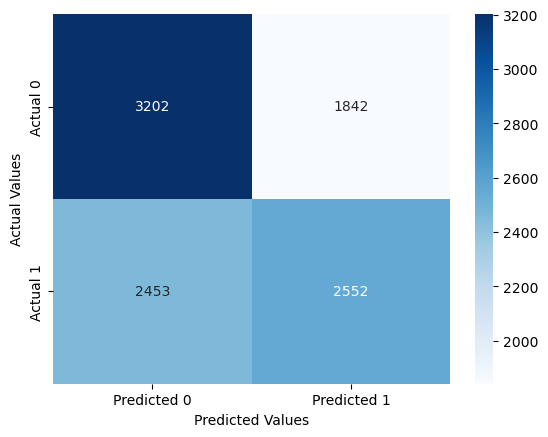

In [21]:
# Finding model performance metrics with train data (undersampling)
confusion_matrix_data(train_undersampling, train_undersampling.readmitted, logit_model, cutoff=0.5)

#### Base Model Performance on Test Data 

Testing the base model's performance on test data

Classification accuracy = 61.9%
Precision = 11.9%
TPR or Recall = 50.3%
FNR = 49.7%
FPR = 36.9%
ROC-AUC = 58.9%


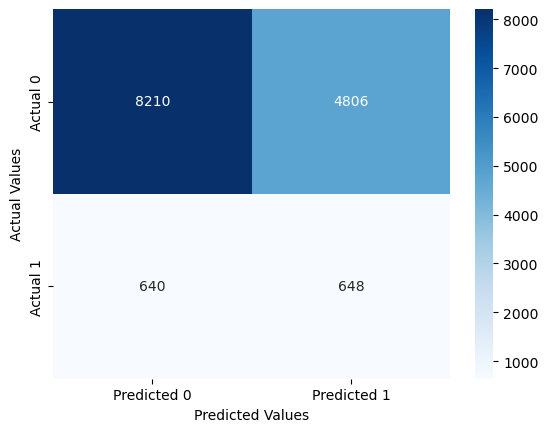

In [22]:
# Finding model performance metrics with test data (undersampling)
confusion_matrix_data(test, test.readmitted, logit_model, cutoff=0.5)

#### Refitting the Base Model with SMOTENC Data 

To see if the base model performed better with SMOTENC data, we refit the model accordingly

In [23]:
# Refitting the model with SMOTENC data 
logit_model2 = sm.logit(formula = 'readmitted ~ time_in_hospital*age + num_of_changes + number_inpatient', data = train1).fit() #Developing logistic regression model
logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.671192
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104418
Model:                          Logit   Df Residuals:                   104412
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                 0.03168
Time:                        23:10:16   Log-Likelihood:                -70084.
converged:                       True   LL-Null:                       -72377.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.2629      0.057    -39.771      0.000      -2.374      -2.151
time_in_hospital         0.2012      0.011     17.591      0.000       0.179       0.224
age                      0.0339      0.001     40.978      0.000       0.032       0.035
time_in_hospital:age    -0.0028      0.000    -16.988      0.000      -0.003      -0.002
num_of_changes          -0.5269      0.015    -34.415      0.000      -0.557      -0.497
number_inpatient         0.1540      0.010     14.807      0.000       0.134       0.174
========================================================================================
"""

##### Base Model Performance on Training Data with SMOTENC

Testing the model's performance with SMOTENC training data

Classification accuracy = 58.6%
Precision = 58.0%
TPR or Recall = 62.7%
FNR = 37.3%
FPR = 45.5%
ROC-AUC = 60.8%


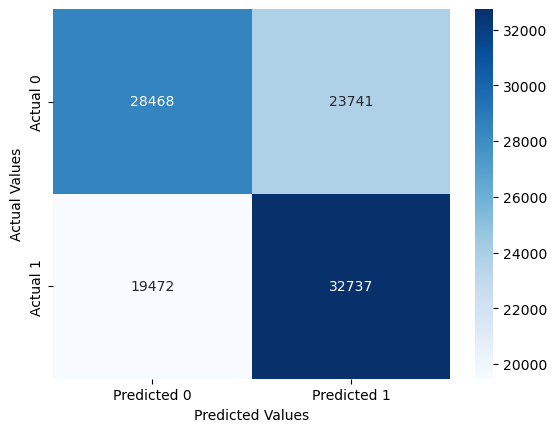

In [24]:
# Finding the model's performance metrics with train data (SMOTENC)
confusion_matrix_data(train1, train1.readmitted, logit_model2, cutoff=0.5)


##### Base Model Performance on Test Data with SMOTENC

Testing the model's performance with test data

Classification accuracy = 53.9%
Precision = 9.7%
TPR or Recall = 49.5%
FNR = 50.5%
FPR = 45.7%
ROC-AUC = 52.5%


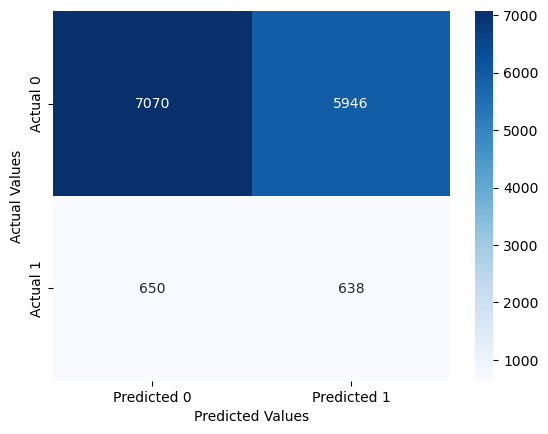

In [25]:
# Finding the model's performance metrics with test data (SMOTENC)
confusion_matrix_data(test, test.readmitted, logit_model2, cutoff=0.5)

#### Optimizing for the Decision Threshold

Seeing if we can further improve our model's recall (and decrease its False Negative Rate) by optimizing the decision threshold)

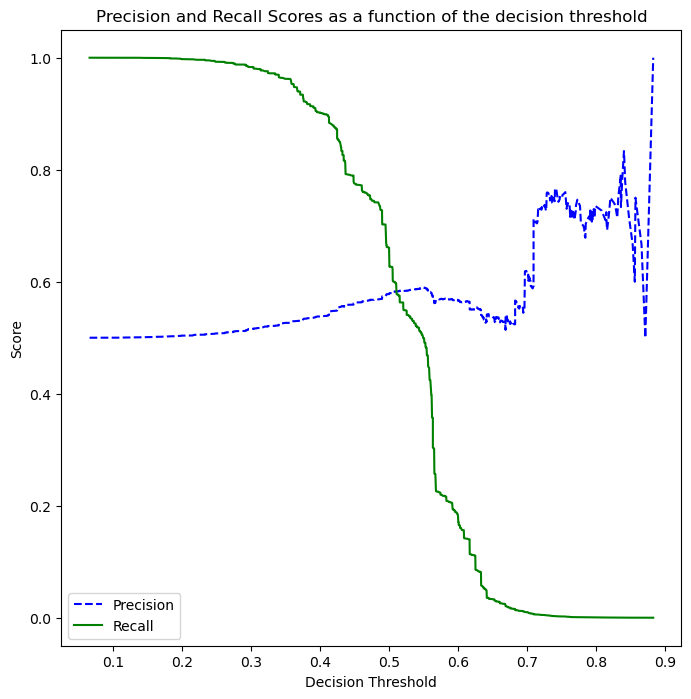

In [26]:
# Finding the percentage of positive values
perc = train1.readmitted.mean()

# Plotting precision and recall scores as a function of the decision threshold
from sklearn.metrics import precision_recall_curve

y = train1.readmitted
ypred = logit_model2.predict(train1)
p, r, thresholds = precision_recall_curve(y, ypred)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)


In [27]:
lista = []

# Iterate thru thresholds, get true_pos / true_neg, find corresponding threshold
for i in thresholds: 
    # Confusion matrix
    cm_df = pd.DataFrame(logit_model2.pred_table(threshold = i))
    lista.append(cm_df[1].sum() / len(train1))

# Finding the optimal threshold
b = (perc * r[:-1]) - ((1 - p[:-1]) * lista)
c = thresholds[np.argmax(b)] 
opt_threshold = c

# Printing the optimal threshold I found using precision and recall
print('Optimal threshold:', opt_threshold)


Optimal threshold: 0.4945978082992961


#### Testing Base Model Performance With Optimized Threshold

Testing our model's train and test performance with the optimized threshold on SMOTENC data

Classification accuracy = 59.1%
Precision = 57.4%
TPR or Recall = 70.2%
FNR = 29.8%
FPR = 52.1%
ROC-AUC = 60.8%


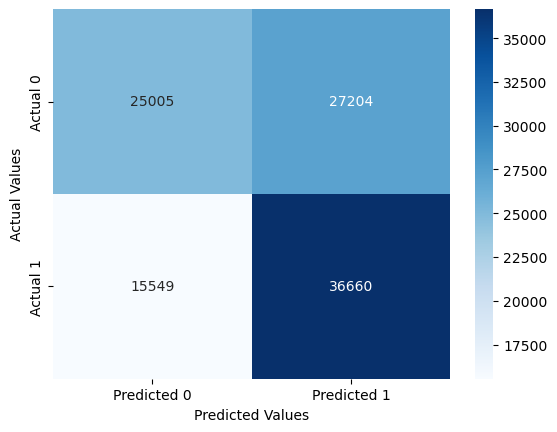

In [28]:
# Finding the model performance metrics on train data (SMOTENC) (with optimized threshold)
confusion_matrix_data(train1, train1.readmitted, logit_model2, cutoff=opt_threshold)


Classification accuracy = 48.3%
Precision = 9.4%
TPR or Recall = 55.1%
FNR = 44.9%
FPR = 52.4%
ROC-AUC = 52.5%


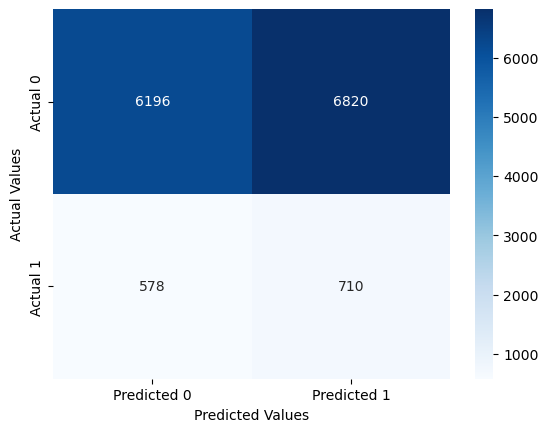

In [29]:
# Finding the model performance metrics on test data (with optimized threshold)
confusion_matrix_data(test, test.readmitted, logit_model2, cutoff=opt_threshold)

### Model Optimization
*Amy Wang*

In the following models, I built upon the preliminary models with variable selection. I noticed that individual values of the categorical predictors such as `age` and `time_in_hospital` have different distributions, and created a few exploratory models investigating the sole effect of these predictors, the combined effect, and experimenting with interactions.

I created a final model combining the promising results of this investigation.

To summarize the following code:
1. Model 1.1: Making each value of `age` its own predictor
2. Model 1.2: Adding in the other variables in the original `logit_model`
3. Model 1.3: Interaction between `time_in_hospital` and each `age` value
4. Model 2.1: Making each value of `time_in_hospital` its own predictor
5. Model 2.2: Adding the interaction between each value of `time_in_hospital` with `num_of_changes`
6. Model 2.3: Making each value of both `time_in_hospital` and `age` their own predictors
7. Model 3.1: Investigate the predictive capability of `diag_1`
8. Model 3.2: Investigate the predictive capability of both `diag_1` and `diag_2`
9. Model 3.2: Investigate the predictive capability of `diag_1`, `diag_2`, and `diag_3`
10. Model 4.1: Make non-collinear values of `discharge_disposition_id` its own predictor
11. Model 4.2: Make non-collinear values of `admission_source_id` its own predictor
12. Model 4.3: Make non-collinear values of `admission_type` its own predictor
13. Model 5: A combined model incorporating all insights from the previous 12 models

In [ ]:
# Understand the baseline model: investigate how well the logit_model predicts hospital readmission based on age -- training data
age_data = train1.groupby('age')['readmitted'].agg([('readmitted_percent','mean'),('nobs','count')]).reset_index(drop=False)
train1_dummy["age_ind"] =  train1_dummy["age"].map({5: 0, 15: 1, 25: 2, 35: 3, 45: 4, 55: 5, 65: 6, 75: 7, 85: 8, 95: 9, 105: 10})
sns.lineplot(x = age_data.index, y= age_data['readmitted_percent'])
sns.lineplot(x = 'age_ind', y= logit_model.predict(train1_dummy), data = train1_dummy, color = 'blue') 
plt.xlabel('age')

In [ ]:
# Examine whether there are multicollinear variables for variable selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train1_dummy[['age5', 'age15', 'age25', 'age35', 'age45', 'age55',
       'age65', 'age75', 'age85', 'time_in_hospital1',
       'time_in_hospital2', 'time_in_hospital3', 'time_in_hospital4',
       'time_in_hospital5', 'time_in_hospital6', 'time_in_hospital7',
       'time_in_hospital8', 'time_in_hospital9', 'time_in_hospital10',
       'time_in_hospital11', 'time_in_hospital12', 'time_in_hospital13', 'admission_type_id1', 'admission_type_id3',
       'admission_type_id4', 'discharge_disposition_id7',
       'discharge_disposition_id10', 'discharge_disposition_id11',
       'discharge_disposition_id18', 'discharge_disposition_id27', 'admission_source_id8',
       'admission_source_id9', 'number_inpatient', 'num_of_changes',  'diag_1circulatory',
       'diag_1diabetes', 'diag_1digestive', 'diag_1musculoskeletal', 'diag_1neoplasms', 'diag_1other', 'diag_1pregnecy', 'diag_1respiratory', 'diag_2circulatory', 'diag_2diabetes', 'diag_2digestive', 'diag_2musculoskeletal', 'diag_2neoplasms','diag_2other', 'diag_2pregnecy', 'diag_2respiratory']]
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

Model 1.1: Making each value of `age` its own predictor

In [ ]:
model1_1 = sm.logit(formula = "readmitted ~ age5 + age15 + age25 + age35 + age45 + age55 + age65 + age75 + age85", data = train1_dummy).fit() 
model1_1.summary()

Optimization terminated successfully.
         Current function value: 0.672258
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104454
Method:                           MLE   Df Model:                            9
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.03014
Time:                        10:47:44   Log-Likelihood:                -70227.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8186      0.049    -16.841      0.000      -0.914      -0.723
age5          -2.8535      0.587     -4.864      0.000      -4.003      -1.704
age15         -0.8262      0.133     -6.217      0.000      -1.087      -0.566
age25         -0.5609      0.090     -6.240      0.000      -0.737      -0.385
age35         -0.2119      0.065     -3.261      0.001      -0.339      -0.085
age45          0.1978      0.054      3.655      0.000       0.092       0.304
age55          0.4189      0.051      8.165      0.000       0.318       0.519
age65          0.8796      0.050     17.494      0.000       0.781       0.978
age75          1.1826      0.050     23.692      0.000       1.085       1.280
age85          1.0395      0.051     20.468      0.000       0.940       1.139
==============================================================================
"""

Classification accuracy = 58.2%
Precision = 55.7%
TPR or Recall = 79.8%
FNR = 20.2%
FPR = 63.4%
ROC-AUC = 60.5%


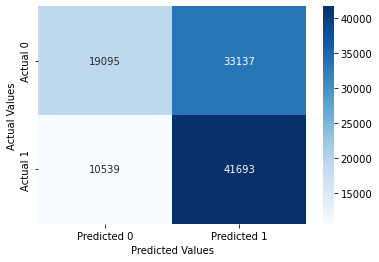

In [ ]:
confusion_matrix_data(train1_dummy, train1_dummy.readmitted, model1_1, cutoff=0.5)

Classification accuracy = 40.0%
Precision = 10.1%
TPR or Recall = 70.0%
FNR = 30.0%
FPR = 63.0%
ROC-AUC = 53.9%


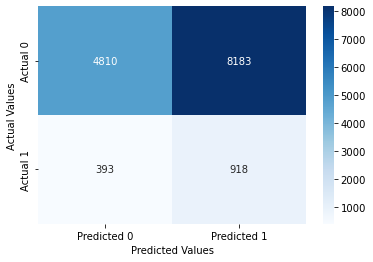

In [ ]:
confusion_matrix_data(test_dummy, test_dummy.readmitted, model1_1, cutoff=0.5)

*Note: each subsequent model will be evaluated using the confusion matrices in the same way, with the same 0.5 cutoff. The summary statistics will be copied directly for brevity of this report.*

Text(0.5, 0, 'age')

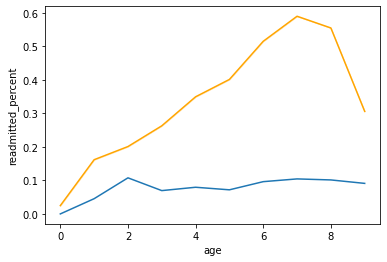

In [ ]:
# Visual inspection of how well the logit_model predicts hospital readmission based on age, on test data. The plot suggests overfitting.
age_data = test.groupby('age')['readmitted'].agg([('readmitted_percent','mean'),('nobs','count')]).reset_index(drop=False)
test_dummy["age_ind"] =  test_dummy["age"].map({5: 0, 15: 1, 25: 2, 35: 3, 45: 4, 55: 5, 65: 6, 75: 7, 85: 8, 95: 9, 105: 10})
sns.lineplot(x = age_data.index, y= age_data['readmitted_percent'])
sns.lineplot(x = 'age_ind', y= model1_1.predict(test_dummy), data = test_dummy, color = 'orange') 
plt.xlabel('age')

Model 1.2: Adding in the other variables in the original `logit_model`

In [ ]:
model1_2 = sm.logit(formula = "readmitted ~ time_in_hospital + age5 + age15 + age25 + age35 + age45 + age55 + age65 + age75 + age85 + num_of_changes + number_inpatient", data = train1_dummy).fit() 
model1_2.summary()

Optimization terminated successfully.
         Current function value: 0.665507
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104451
Method:                           MLE   Df Model:                           12
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.03988
Time:                        10:47:54   Log-Likelihood:                -69521.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7932      0.050    -15.886      0.000      -0.891      -0.695
time_in_hospital     0.0077      0.002      3.396      0.001       0.003       0.012
age5                -2.8084      0.587     -4.785      0.000      -3.959      -1.658
age15               -0.7544      0.134     -5.644      0.000      -1.016      -0.492
age25               -0.4803      0.091     -5.306      0.000      -0.658      -0.303
age35               -0.1463      0.065     -2.237      0.025      -0.275      -0.018
age45                0.2577      0.054      4.735      0.000       0.151       0.364
age55                0.4423      0.052      8.576      0.000       0.341       0.543
age65                0.9100      0.051     18.004      0.000       0.811       1.009
age75                1.1918      0.050     23.761      0.000       1.093       1.290
age85                1.0440      0.051     20.458      0.000       0.944       1.144
num_of_changes      -0.5263      0.015    -34.030      0.000      -0.557      -0.496
number_inpatient     0.1466      0.010     14.338      0.000       0.127       0.167
====================================================================================
"""

Metrics on training data <br>
- Classification accuracy = 59.5%
- Precision = 58.0%
- TPR or Recall = 69.0%
- FNR = 31.0%
- FPR = 50.0%
- ROC-AUC = 62.8%

Metrics on test data <br>
- Classification accuracy = 51.0%
- Precision = 10.1%
- TPR or Recall = 55.3%
- FNR = 44.7%
- FPR = 49.4%
- ROC-AUC = 54.9%

Model 1.3: Interaction between `time_in_hospital` and each `age` value

In [ ]:
model1_3 = sm.logit(formula = 'readmitted ~ time_in_hospital*age5 + time_in_hospital*age15 + time_in_hospital*age25 + time_in_hospital*age35 + time_in_hospital*age45 + time_in_hospital*age55 + time_in_hospital*age65 + time_in_hospital*age75 + time_in_hospital*age85 +  + num_of_changes + number_inpatient', data = train1_dummy).fit(maxiter = 100) 
model1_3.summary()

Optimization terminated successfully.
         Current function value: 0.664681
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104442
Method:                           MLE   Df Model:                           21
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04107
Time:                        10:48:03   Log-Likelihood:                -69435.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4670      0.097     -4.829      0.000      -0.656      -0.277
time_in_hospital          -0.0652      0.019     -3.410      0.001      -0.103      -0.028
age5                      -3.5511      1.510     -2.352      0.019      -6.511      -0.591
time_in_hospital:age5      0.2352      0.522      0.450      0.652      -0.788       1.259
age15                     -1.7211      0.239     -7.191      0.000      -2.190      -1.252
time_in_hospital:age15     0.2653      0.053      4.981      0.000       0.161       0.370
age25                     -0.8523      0.165     -5.161      0.000      -1.176      -0.529
time_in_hospital:age25     0.0863      0.037      2.346      0.019       0.014       0.158
age35                     -0.6767      0.123     -5.513      0.000      -0.917      -0.436
time_in_hospital:age35     0.1271      0.025      5.098      0.000       0.078       0.176
age45                     -0.2660      0.105     -2.524      0.012      -0.473      -0.059
time_in_hospital:age45     0.1230      0.021      5.870      0.000       0.082       0.164
age55                     -0.0545      0.101     -0.539      0.590      -0.253       0.144
time_in_hospital:age55     0.1148      0.020      5.728      0.000       0.075       0.154
age65                      0.5796      0.099      5.827      0.000       0.385       0.775
time_in_hospital:age65     0.0740      0.020      3.766      0.000       0.036       0.113
age75                      0.9146      0.099      9.243      0.000       0.721       1.109
time_in_hospital:age75     0.0619      0.020      3.173      0.002       0.024       0.100
age85                      0.8729      0.101      8.666      0.000       0.675       1.070
time_in_hospital:age85     0.0394      0.020      1.991      0.047       0.001       0.078
num_of_changes            -0.5282      0.015    -34.156      0.000      -0.559      -0.498
number_inpatient           0.1456      0.010     14.237      0.000       0.126       0.166
==========================================================================================
"""

Metrics on training data
- Classification accuracy = 59.4%
- Precision = 57.9%
- TPR or Recall = 69.5%
- FNR = 30.5%
- FPR = 50.6%
- ROC-AUC = 62.7%

Metrics on test data
- Classification accuracy = 50.5%
- Precision = 10.1%
- TPR or Recall = 55.8%
- FNR = 44.2%
- FPR = 50.0%
- ROC-AUC = 54.4%

Model 2.1: Making each value of `time_in_hospital` its own predictor

In [ ]:
model2_1 = sm.logit(formula = 'readmitted ~ time_in_hospital1 + time_in_hospital2 + time_in_hospital3 + time_in_hospital4 + time_in_hospital5 + time_in_hospital6 + time_in_hospital7 + time_in_hospital8 + time_in_hospital9 + time_in_hospital10 + time_in_hospital11 + time_in_hospital12 + time_in_hospital13 + num_of_changes + number_inpatient', data = train1_dummy).fit() 
model2_1.summary()

Optimization terminated successfully.
         Current function value: 0.681039
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104448
Method:                           MLE   Df Model:                           15
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.01747
Time:                        10:48:12   Log-Likelihood:                -71144.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4137      0.075     -5.484      0.000      -0.562      -0.266
time_in_hospital1      0.1612      0.077      2.087      0.037       0.010       0.313
time_in_hospital2      0.4402      0.077      5.733      0.000       0.290       0.591
time_in_hospital3      0.5517      0.077      7.196      0.000       0.401       0.702
time_in_hospital4      0.6356      0.077      8.245      0.000       0.485       0.787
time_in_hospital5      0.5765      0.078      7.405      0.000       0.424       0.729
time_in_hospital6      0.7384      0.078      9.410      0.000       0.585       0.892
time_in_hospital7      0.6414      0.080      8.055      0.000       0.485       0.797
time_in_hospital8      0.7241      0.081      8.921      0.000       0.565       0.883
time_in_hospital9      0.4297      0.085      5.063      0.000       0.263       0.596
time_in_hospital10     0.6012      0.087      6.926      0.000       0.431       0.771
time_in_hospital11     0.2204      0.092      2.404      0.016       0.041       0.400
time_in_hospital12     0.4057      0.094      4.293      0.000       0.220       0.591
time_in_hospital13     0.1331      0.101      1.313      0.189      -0.066       0.332
num_of_changes        -0.5876      0.015    -38.639      0.000      -0.617      -0.558
number_inpatient       0.1483      0.010     14.630      0.000       0.128       0.168
======================================================================================
"""

Metrics on training data
- Classification accuracy = 56.2%
- Precision = 54.7%
- TPR or Recall = 72.7%
- FNR = 27.3%
- FPR = 60.2%
- ROC-AUC = 58.5%

Metrics on test data
- Classification accuracy = 42.2%
- Precision = 9.5%
- TPR or Recall = 61.9%
- FNR = 38.1%
- FPR = 59.8%
- ROC-AUC = 53.0%

Model 2.2: Adding the interaction between each value of `time_in_hospital` with `num_of_changes`

In [ ]:
model2_2 = sm.logit(formula = 'readmitted ~ num_of_changes*time_in_hospital1 + num_of_changes*time_in_hospital2 + num_of_changes*time_in_hospital3 + num_of_changes*time_in_hospital4 + num_of_changes*time_in_hospital5 + num_of_changes*time_in_hospital6 + num_of_changes*time_in_hospital7 + num_of_changes*time_in_hospital8 + num_of_changes*time_in_hospital9 + num_of_changes*time_in_hospital10 + num_of_changes*time_in_hospital11 + num_of_changes*time_in_hospital12 + num_of_changes*time_in_hospital13', data = train1_dummy).fit() 
model2_2.summary()

Optimization terminated successfully.
         Current function value: 0.681168
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104436
Method:                           MLE   Df Model:                           27
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.01728
Time:                        10:48:20   Log-Likelihood:                -71158.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2914      0.089     -3.278      0.001      -0.466      -0.117
num_of_changes                       -0.8680      0.157     -5.535      0.000      -1.175      -0.561
time_in_hospital1                     0.0189      0.091      0.208      0.835      -0.159       0.197
num_of_changes:time_in_hospital1      0.6119      0.165      3.718      0.000       0.289       0.934
time_in_hospital2                     0.2906      0.090      3.215      0.001       0.113       0.468
num_of_changes:time_in_hospital2      0.6016      0.162      3.723      0.000       0.285       0.918
time_in_hospital3                     0.4590      0.090      5.083      0.000       0.282       0.636
num_of_changes:time_in_hospital3      0.2651      0.161      1.645      0.100      -0.051       0.581
time_in_hospital4                     0.5287      0.091      5.823      0.000       0.351       0.707
num_of_changes:time_in_hospital4      0.3353      0.162      2.074      0.038       0.018       0.652
time_in_hospital5                     0.5242      0.092      5.719      0.000       0.345       0.704
num_of_changes:time_in_hospital5      0.0937      0.164      0.572      0.567      -0.227       0.415
time_in_hospital6                     0.6642      0.092      7.192      0.000       0.483       0.845
num_of_changes:time_in_hospital6      0.2191      0.165      1.331      0.183      -0.103       0.542
time_in_hospital7                     0.6224      0.094      6.640      0.000       0.439       0.806
num_of_changes:time_in_hospital7     -0.0119      0.167     -0.071      0.943      -0.340       0.316
time_in_hospital8                     0.7130      0.095      7.468      0.000       0.526       0.900
num_of_changes:time_in_hospital8     -0.0520      0.171     -0.304      0.761      -0.387       0.283
time_in_hospital9                     0.4055      0.100      4.069      0.000       0.210       0.601
num_of_changes:time_in_hospital9      0.0271      0.179      0.151      0.880      -0.323       0.378
time_in_hospital10                    0.5136      0.103      4.998      0.000       0.312       0.715
num_of_changes:time_in_hospital10     0.2683      0.179      1.501      0.133      -0.082       0.619
time_in_hospital11                    0.1693      0.108      1.568      0.117      -0.042       0.381
num_of_changes:time_in_hospital11     0.1618      0.190      0.851      0.395      -0.211       0.535
time_in_hospital12                    0.3778      0.111      3.389      0.001       0.159       0.596
num_of_changes:time_in_hospital12     0.0781      0.196      0.398      0.691      -0.307       0.463
time_in_hospital13                    0.0912      0.120      0.758      0.449      -0.145       0.327
num_of_changes:time_in_hospital13     0.1562      0.206      0.757      0.449      -0.248       0.561
===============================================================================

Metrics on training data
- Classification accuracy = 56.2%
- Precision = 55.9%
- TPR or Recall = 58.4%
- FNR = 41.6%
- FPR = 46.0%
- ROC-AUC = 58.2%

Metrics on test data
- Classification accuracy = 53.8%
- Precision = 9.8%
- TPR or Recall = 49.2%
- FNR = 50.8%
- FPR = 45.8%
- ROC-AUC = 50.7%

Model 2.3: Making each value of both `time_in_hospital` and `age` their own predictors

In [ ]:
model2_3 = sm.logit(formula = 'readmitted ~ time_in_hospital1 + time_in_hospital2 + time_in_hospital3 + time_in_hospital4 + time_in_hospital5 + time_in_hospital6 + time_in_hospital7 + time_in_hospital8 + time_in_hospital9 + time_in_hospital10 + time_in_hospital11 + time_in_hospital12 + time_in_hospital13 + num_of_changes + number_inpatient + age5 + age15 + age25 + age35 + age45 + age55 + age65 + age75 + age85', data = train1_dummy).fit() 
model2_3.summary()

Optimization terminated successfully.
         Current function value: 0.681168
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104436
Method:                           MLE   Df Model:                           27
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.01728
Time:                        10:48:20   Log-Likelihood:                -71158.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2914      0.089     -3.278      0.001      -0.466      -0.117
num_of_changes                       -0.8680      0.157     -5.535      0.000      -1.175      -0.561
time_in_hospital1                     0.0189      0.091      0.208      0.835      -0.159       0.197
num_of_changes:time_in_hospital1      0.6119      0.165      3.718      0.000       0.289       0.934
time_in_hospital2                     0.2906      0.090      3.215      0.001       0.113       0.468
num_of_changes:time_in_hospital2      0.6016      0.162      3.723      0.000       0.285       0.918
time_in_hospital3                     0.4590      0.090      5.083      0.000       0.282       0.636
num_of_changes:time_in_hospital3      0.2651      0.161      1.645      0.100      -0.051       0.581
time_in_hospital4                     0.5287      0.091      5.823      0.000       0.351       0.707
num_of_changes:time_in_hospital4      0.3353      0.162      2.074      0.038       0.018       0.652
time_in_hospital5                     0.5242      0.092      5.719      0.000       0.345       0.704
num_of_changes:time_in_hospital5      0.0937      0.164      0.572      0.567      -0.227       0.415
time_in_hospital6                     0.6642      0.092      7.192      0.000       0.483       0.845
num_of_changes:time_in_hospital6      0.2191      0.165      1.331      0.183      -0.103       0.542
time_in_hospital7                     0.6224      0.094      6.640      0.000       0.439       0.806
num_of_changes:time_in_hospital7     -0.0119      0.167     -0.071      0.943      -0.340       0.316
time_in_hospital8                     0.7130      0.095      7.468      0.000       0.526       0.900
num_of_changes:time_in_hospital8     -0.0520      0.171     -0.304      0.761      -0.387       0.283
time_in_hospital9                     0.4055      0.100      4.069      0.000       0.210       0.601
num_of_changes:time_in_hospital9      0.0271      0.179      0.151      0.880      -0.323       0.378
time_in_hospital10                    0.5136      0.103      4.998      0.000       0.312       0.715
num_of_changes:time_in_hospital10     0.2683      0.179      1.501      0.133      -0.082       0.619
time_in_hospital11                    0.1693      0.108      1.568      0.117      -0.042       0.381
num_of_changes:time_in_hospital11     0.1618      0.190      0.851      0.395      -0.211       0.535
time_in_hospital12                    0.3778      0.111      3.389      0.001       0.159       0.596
num_of_changes:time_in_hospital12     0.0781      0.196      0.398      0.691      -0.307       0.463
time_in_hospital13                    0.0912      0.120      0.758      0.449      -0.145       0.327
num_of_changes:time_in_hospital13     0.1562      0.206      0.757      0.449      -0.248       0.561
===============================================================================

Metrics on training data
- Classification accuracy = 59.7%
- Precision = 58.8%
- TPR or Recall = 65.3%
- FNR = 34.7%
- FPR = 45.8%
- ROC-AUC = 63.4%

Metrics on test data
- Classification accuracy = 54.0%
- Precision = 10.1%
- TPR or Recall = 51.0%
- FNR = 49.0%
- FPR = 45.6%
- ROC-AUC = 54.6%

Model 3.1: Investigate the predictive capability of `diag_1`

In [ ]:
model3_1 = sm.logit(formula = 'readmitted ~ diag_1', data = train1).fit() 
model3_1.summary()

Optimization terminated successfully.
         Current function value: 0.673863
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104454
Method:                           MLE   Df Model:                            9
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.02782
Time:                        10:48:41   Log-Likelihood:                -70394.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.4319      0.010     42.365      0.000       0.412       0.452
diag_1[T.diabetes]           -0.7514      0.026    -29.156      0.000      -0.802      -0.701
diag_1[T.digestive]          -0.8362      0.025    -33.550      0.000      -0.885      -0.787
diag_1[T.genitourinary]      -0.9242      0.033    -27.609      0.000      -0.990      -0.859
diag_1[T.injury]             -0.4529      0.026    -17.200      0.000      -0.504      -0.401
diag_1[T.musculoskeletal]    -0.8864      0.031    -28.402      0.000      -0.948      -0.825
diag_1[T.neoplasms]          -1.0191      0.038    -26.473      0.000      -1.095      -0.944
diag_1[T.other]              -0.3966      0.018    -21.701      0.000      -0.432      -0.361
diag_1[T.pregnecy]           -2.3800      0.133    -17.899      0.000      -2.641      -2.119
diag_1[T.respiratory]        -0.8861      0.021    -41.431      0.000      -0.928      -0.844
=============================================================================================
"""

Metrics on training data
- Classification accuracy = 58.5%
- Precision = 57.7%
- TPR or Recall = 63.7%
- FNR = 36.3%
- FPR = 46.7%
- ROC-AUC = 60.6%

Metrics on test data
- Classification accuracy = 52.8%
- Precision = 9.9%
- TPR or Recall = 51.3%
- FNR = 48.7%
- FPR = 47.1%
- ROC-AUC = 52.9%

Model 3.2: Investigate the predictive capability of both `diag_1` and `diag_2`

In [ ]:
model3_2 = sm.logit(formula = 'readmitted ~ diag_1 + diag_2', data = train1).fit() 
model3_2.summary()

Optimization terminated successfully.
         Current function value: 0.662591
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104445
Method:                           MLE   Df Model:                           18
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04408
Time:                        10:48:50   Log-Likelihood:                -69217.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.6011      0.012     49.337      0.000       0.577       0.625
diag_1[T.diabetes]           -0.7525      0.027    -28.218      0.000      -0.805      -0.700
diag_1[T.digestive]          -0.7387      0.026    -28.651      0.000      -0.789      -0.688
diag_1[T.genitourinary]      -0.8555      0.034    -25.043      0.000      -0.922      -0.789
diag_1[T.injury]             -0.3690      0.027    -13.579      0.000      -0.422      -0.316
diag_1[T.musculoskeletal]    -0.7667      0.032    -23.993      0.000      -0.829      -0.704
diag_1[T.neoplasms]          -0.8061      0.040    -19.962      0.000      -0.885      -0.727
diag_1[T.other]              -0.3244      0.019    -17.214      0.000      -0.361      -0.287
diag_1[T.pregnecy]           -1.7543      0.164    -10.725      0.000      -2.075      -1.434
diag_1[T.respiratory]        -0.8127      0.022    -37.343      0.000      -0.855      -0.770
diag_2[T.diabetes]           -0.3928      0.021    -18.795      0.000      -0.434      -0.352
diag_2[T.digestive]          -0.8361      0.041    -20.318      0.000      -0.917      -0.755
diag_2[T.genitourinary]      -0.6566      0.028    -23.262      0.000      -0.712      -0.601
diag_2[T.injury]             -0.9889      0.050    -19.665      0.000      -1.087      -0.890
diag_2[T.musculoskeletal]    -1.2736      0.070    -18.311      0.000      -1.410      -1.137
diag_2[T.neoplasms]          -0.6428      0.050    -12.746      0.000      -0.742      -0.544
diag_2[T.other]              -0.0201      0.016     -1.218      0.223      -0.052       0.012
diag_2[T.pregnecy]           -1.3247      0.248     -5.337      0.000      -1.811      -0.838
diag_2[T.respiratory]        -0.6608      0.025    -26.623      0.000      -0.709      -0.612
=============================================================================================
"""

Metrics on training data
- Classification accuracy = 60.4%
- Precision = 61.1%
- TPR or Recall = 57.2%
- FNR = 42.8%
- FPR = 36.4%
- ROC-AUC = 63.2%

Metrics on test data
- Classification accuracy = 61.2%
- Precision = 9.8%
- TPR or Recall = 39.4%
- FNR = 60.6%
- FPR = 36.6%
- ROC-AUC = 52.2%

Model 3.3: Investigate the predictive capability of `diag_1`, `diag_2`, and `diag_3`

In [ ]:
model3_3 = sm.logit(formula = 'readmitted ~ diag_1 + diag_2 + diag_3', data = train1).fit() 
model3_3.summary()

Optimization terminated successfully.
         Current function value: 0.653983
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104436
Method:                           MLE   Df Model:                           27
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.05650
Time:                        10:48:56   Log-Likelihood:                -68318.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.7531      0.015     51.328      0.000       0.724       0.782
diag_1[T.diabetes]           -0.8079      0.027    -29.598      0.000      -0.861      -0.754
diag_1[T.digestive]          -0.7061      0.026    -26.986      0.000      -0.757      -0.655
diag_1[T.genitourinary]      -0.8281      0.035    -23.932      0.000      -0.896      -0.760
diag_1[T.injury]             -0.3504      0.028    -12.702      0.000      -0.405      -0.296
diag_1[T.musculoskeletal]    -0.7206      0.032    -22.289      0.000      -0.784      -0.657
diag_1[T.neoplasms]          -0.7141      0.041    -17.395      0.000      -0.795      -0.634
diag_1[T.other]              -0.3044      0.019    -15.938      0.000      -0.342      -0.267
diag_1[T.pregnecy]           -1.4359      0.184     -7.802      0.000      -1.797      -1.075
diag_1[T.respiratory]        -0.7962      0.022    -36.283      0.000      -0.839      -0.753
diag_2[T.diabetes]           -0.4634      0.021    -21.772      0.000      -0.505      -0.422
diag_2[T.digestive]          -0.8154      0.042    -19.583      0.000      -0.897      -0.734
diag_2[T.genitourinary]      -0.6598      0.029    -23.107      0.000      -0.716      -0.604
diag_2[T.injury]             -0.9381      0.051    -18.378      0.000      -1.038      -0.838
diag_2[T.musculoskeletal]    -1.2023      0.071    -17.042      0.000      -1.341      -1.064
diag_2[T.neoplasms]          -0.5283      0.052    -10.168      0.000      -0.630      -0.426
diag_2[T.other]              -0.0223      0.017     -1.335      0.182      -0.055       0.010
diag_2[T.pregnecy]           -1.2678      0.252     -5.035      0.000      -1.761      -0.774
diag_2[T.respiratory]        -0.6470      0.025    -25.818      0.000      -0.696      -0.598
diag_3[T.diabetes]           -0.3352      0.019    -17.390      0.000      -0.373      -0.297
diag_3[T.digestive]          -0.5433      0.041    -13.391      0.000      -0.623      -0.464
diag_3[T.genitourinary]      -0.5951      0.032    -18.500      0.000      -0.658      -0.532
diag_3[T.injury]             -0.9707      0.059    -16.406      0.000      -1.087      -0.855
diag_3[T.musculoskeletal]    -1.1525      0.069    -16.719      0.000      -1.288      -1.017
diag_3[T.neoplasms]          -0.7250      0.064    -11.279      0.000      -0.851      -0.599
diag_3[T.other]               0.0344      0.016      2.148      0.032       0.003       0.066
diag_3[T.pregnecy]           -1.0356      0.274     -3.782      0.000      -1.572      -0.499
diag_3[T.respiratory]        -0.6582      0.030    -21.846      0.000      -0.717      -0.599
=============================================================================================
"""

Metrics on training data
- Classification accuracy = 61.1%
- Precision = 60.6%
- TPR or Recall = 63.3%
- FNR = 36.7%
- FPR = 41.1%
- ROC-AUC = 65.4%

Metrics on test data
- Classification accuracy = 56.8%
- Precision = 9.2%
- TPR or Recall = 41.9%
- FNR = 58.1%
- FPR = 41.7%
- ROC-AUC = 50.6%

Model 4.1: Make non-collinear values of `discharge_disposition_id` their own predictor

In [ ]:
model4_1 = sm.logit(formula = 'readmitted ~ discharge_disposition_id7 + discharge_disposition_id10 + discharge_disposition_id18', data = train1_dummy).fit() 
model4_1.summary()

Optimization terminated successfully.
         Current function value: 0.691713
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104460
Method:                           MLE   Df Model:                            3
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                0.002069
Time:                        10:49:04   Log-Likelihood:                -72259.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                 1.188e-64
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.0065      0.006     -1.021      0.307      -0.019       0.006
discharge_disposition_id7     -2.0696      0.175    -11.859      0.000      -2.412      -1.728
discharge_disposition_id10    -0.5615      0.304     -1.849      0.064      -1.157       0.034
discharge_disposition_id18     0.2326      0.028      8.169      0.000       0.177       0.288
==============================================================================================
"""

Metrics on training data
- Classification accuracy = 50.6%
- Precision = 55.6%
- TPR or Recall = 5.6%
- FNR = 94.4%
- FPR = 4.5%
- ROC-AUC = 50.8%

Metrics on test data
- Classification accuracy = 86.9%
- Precision = 7.7%
- TPR or Recall = 4.0%
- FNR = 96.0%
- FPR = 4.8%
- ROC-AUC = 49.7%

Model 4.2: Make non-collinear values of `admission_source_id` their own predictor

In [ ]:
model4_2 = sm.logit(formula = 'readmitted ~ admission_source_id8 + admission_source_id9', data = train1_dummy).fit() 
model4_2.summary()

Optimization terminated successfully.
         Current function value: 0.692811
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104461
Method:                           MLE   Df Model:                            2
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:               0.0004855
Time:                        10:49:11   Log-Likelihood:                -72374.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                 5.395e-16
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0131      0.006      2.053      0.040       0.001       0.026
admission_source_id8    -2.3157      1.049     -2.208      0.027      -4.371      -0.260
admission_source_id9    -0.1955      0.025     -7.844      0.000      -0.244      -0.147
========================================================================================
"""

Metrics on training data
- Classification accuracy = 50.6%
- Precision = 50.3%
- TPR or Recall = 94.0%
- FNR = 6.0%
- FPR = 92.7%
- ROC-AUC = 50.6%

Metrics on test data
- Classification accuracy = 15.3%
- Precision = 9.2%
- TPR or Recall = 93.5%
- FNR = 6.5%
- FPR = 92.6%
- ROC-AUC = 50.4%

Model 4.3: Make non-collinear values of `admission_type` their own predictor

In [ ]:
model4_3 = sm.logit(formula = 'readmitted ~ admission_type_id1 + admission_type_id3 + admission_type_id4', data = train1_dummy).fit() 
model4_3.summary()

Optimization terminated successfully.
         Current function value: 0.679143
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104460
Method:                           MLE   Df Model:                            3
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.02020
Time:                        10:49:19   Log-Likelihood:                -70946.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2973      0.020    -14.838      0.000      -0.337      -0.258
admission_type_id1     0.4742      0.021     22.297      0.000       0.432       0.516
admission_type_id3    -0.4791      0.027    -17.939      0.000      -0.531      -0.427
admission_type_id4    -1.3121      1.096     -1.198      0.231      -3.460       0.835
======================================================================================
"""

Metrics on training data
- Classification accuracy = 56.7%
- Precision = 54.4%
- TPR or Recall = 82.7%
- FNR = 17.3%
- FPR = 69.3%
- ROC-AUC = 57.0%

Metrics on test data
- Classification accuracy = 34.8%
- Precision = 9.3%
- TPR or Recall = 69.6%
- FNR = 30.4%
- FPR = 68.7%
- ROC-AUC = 50.4%

Model 5: A combined model incorporating all insights from the previous 12 models

In [ ]:
model_5 = sm.logit(formula = 'readmitted ~ age5 + age15 + age25 + age45 + age55 + age65 + age75 + age85 + diag_1circulatory + diag_1diabetes + diag_1digestive + diag_1injury + diag_1musculoskeletal + diag_1neoplasms + diag_1other + diag_1pregnecy + time_in_hospital1 + time_in_hospital2 + time_in_hospital3 + time_in_hospital4 + time_in_hospital5 + time_in_hospital6 + time_in_hospital7 + time_in_hospital8 + time_in_hospital9 + time_in_hospital10 + time_in_hospital11 + time_in_hospital12 + time_in_hospital13 + discharge_disposition_id7 + discharge_disposition_id18 + admission_type_id1 + admission_type_id3 + num_of_changes + number_inpatient + diag_2circulatory + diag_2diabetes + diag_2digestive + diag_2injury + diag_2musculoskeletal + diag_2other', data = train1_dummy).fit() 
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.623802
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104464
Model:                          Logit   Df Residuals:                   104422
Method:                           MLE   Df Model:                           41
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                  0.1000
Time:                        11:12:33   Log-Likelihood:                -65165.
converged:                       True   LL-Null:                       -72409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.7392      0.092    -29.875      0.000      -2.919      -2.560
age5                          -2.8764      0.587     -4.901      0.000      -4.027      -1.726
age15                         -0.7324      0.132     -5.567      0.000      -0.990      -0.475
age25                         -0.2397      0.087     -2.765      0.006      -0.410      -0.070
age45                          0.3192      0.042      7.601      0.000       0.237       0.402
age55                          0.5080      0.038     13.353      0.000       0.433       0.583
age65                          0.9616      0.037     26.297      0.000       0.890       1.033
age75                          1.2130      0.036     33.679      0.000       1.142       1.284
age85                          1.0408      0.037     27.895      0.000       0.968       1.114
diag_1circulatory              0.8404      0.020     41.337      0.000       0.801       0.880
diag_1diabetes                 0.3648      0.031     11.628      0.000       0.303       0.426
diag_1digestive                0.0673      0.030      2.276      0.023       0.009       0.125
diag_1injury                   0.4244      0.031     13.644      0.000       0.363       0.485
diag_1musculoskeletal          0.2963      0.037      8.101      0.000       0.225       0.368
diag_1neoplasms                0.2181      0.043      5.034      0.000       0.133       0.303
diag_1other                    0.5297      0.023     22.603      0.000       0.484       0.576
diag_1pregnecy                -0.0654      0.145     -0.451      0.652      -0.350       0.219
time_in_hospital1              0.3141      0.081      3.865      0.000       0.155       0.473
time_in_hospital2              0.5875      0.081      7.277      0.000       0.429       0.746
time_in_hospital3              0.7020      0.081      8.710      0.000       0.544       0.860
time_in_hospital4              0.7584      0.081      9.364      0.000       0.600       0.917
time_in_hospital5              0.6684      0.082      8.171      0.000       0.508       0.829
time_in_hospital6              0.8306      0.082     10.073      0.000       0.669       0.992
time_in_hospital7              0.7184      0.084      8.588      0.000       0.554       0.882
time_in_hospital8              0.8350      0.085      9.790      0.000       0.668       1.002
time_in_hospital9              0.4700      0.089      5.268      0.000       0.295       0.645
time_in_hospital10             0.6839      0.091      7.490      0.000       0.505       0.863
time_in_hospital11             0.3170      0.096      3.294      0.001       0.128       0.506
time_in_hospital12             0.5041      0.100      5.065      0.000       0.309       0.699
time_in_hospital13             0.2316      0.106      2.177      0.029       0.023       0.440
discharge_disposition_id7     -1.7631      0.180     -9.791      0.000      -2.116      -1.410
discharge_d

Metrics from training data
- Classification accuracy = 65.4%
- Precision = 64.3%
- TPR or Recall = 69.2%
- FNR = 30.8%
- FPR = 38.4%
- ROC-AUC = 70.7%

Metrics from test data
- Classification accuracy = 60.0%
- Precision = 10.4%
- TPR or Recall = 44.2%
- FNR = 55.8%
- FPR = 38.4%
- ROC-AUC = 54.4%

The above metrics were for calculated for the cutoff of 0.5. To understand if a different cutoff would improve these metrics, we applied the best cutoff threshold determined by the precision-recall curve.

In [ ]:
# Finding the percentage of positive values
perc = train1_dummy.readmitted.mean()

# Plotting precision and recall scores as a function of the decision threshold
from sklearn.metrics import precision_recall_curve

y = train1_dummy.readmitted
ypred = model_5.predict(train1_dummy)
p, r, thresholds = precision_recall_curve(y, ypred)

lista = []

# Iterate thru thresholds, get true_pos / true_neg, find corresponding threshold
for i in thresholds: 
    # Confusion matrix
    cm_df = pd.DataFrame(model_5.pred_table(threshold = i))
    lista.append(cm_df[1].sum() / len(train1_dummy))

# Finding the optimal threshold
b = (perc * r[:-1]) - ((1 - p[:-1]) * lista)
c = thresholds[np.argmax(b)] 
opt_threshold = c
# Printing the optimal threshold I found using precision and recall
print('Optimal threshold:', opt_threshold)

Optimal threshold: 0.5043577529636262


Metrics from training data, with cutoff = 0.5043577529636262
- Classification accuracy = 65.4%
- Precision = 64.6%
- TPR or Recall = 68.4%
- FNR = 31.6%
- FPR = 37.5%
- ROC-AUC = 70.7%

Metrics from test data, with cutoff = 0.5043577529636262
- Classification accuracy = 60.7%
- Precision = 10.4%
- TPR or Recall = 42.9%
- FNR = 57.1%
- FPR = 37.5%
- ROC-AUC = 54.4%

### Finalizing the Model
*Anastasia Wei*

I attempted to build upon the model optimization that Amy did and use Sklearn for variable selection and adding in interaction terms. <br>

The interactions terms I tested out to added to the first models are 
- change * diabetesMed
- age * time_in_hospital
- age * number_inpatient
- change * admission_source_id

In [ ]:
# Used Amy's SMOTENC approach to make the train and test data

X_train = train.drop(columns="readmitted")
y_train = train.loc[:, "readmitted"]

X_train_types = X_train.dtypes.to_frame().rename(columns={0: "type"})
# get the name of all variables that are objects
object_vars = list(X_train_types.loc[X_train_types.type == "object", :].index)
object_vars = object_vars + ["age", "admission_type_id", "discharge_disposition_id", "admission_source_id", "time_in_hospital", "num_of_changes"]

# get the indices of all 
object_var_indices = []
for i in range(0, len(X_train.columns)):
    if X_train.columns[i] in object_vars:
        object_var_indices.append(i)
        
smote_nc = SMOTENC(categorical_features=object_var_indices, random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# add the readmitted data back in
X_resampled.loc[:, "readmitted"] = y_resampled
train1 = X_resampled.copy()

# make train_dummy and test_dummy predictors
dummy_preds = ["age", "time_in_hospital", "admission_type_id", "discharge_disposition_id", "admission_source_id", 
               "diag_1", "diag_2", 'diabetesMed','change']
train1_dummy = train1.copy()
test_dummy = test.copy()
vars = []

for pred in dummy_preds:
    dummy_train = pd.get_dummies(train1.loc[:, pred])
    dummy_train.columns = [pred + str(x) for x in dummy_train.columns]
    train1_dummy = pd.concat([train1_dummy, dummy_train], axis=1)
    vars.append(list(dummy_train.columns))
    
    dummy_test = pd.get_dummies(test.loc[:, pred])
    dummy_test.columns = [pred + str(x) for x in dummy_test.columns]
    test_dummy = pd.concat([test_dummy, dummy_test], axis=1)


In [ ]:
# feature selection with sklearn
from sklearn.linear_model import LogisticRegression

# getting a list of the all the usable numerical predictors
preds = train1_dummy.dtypes[train1_dummy.dtypes != object].index.tolist()
# dropping the unusable and duplicate numeric predictors
preds.remove('age')
preds.remove('time_in_hospital')
preds.remove('admission_type_id')
preds.remove('discharge_disposition_id')
preds.remove('admission_source_id')
preds.remove('encounter_id')
preds.remove('patient_nbr')
preds.remove('discharge_disposition_id27')
preds.remove('readmitted')

# creating the features and the response for skLearn
sk_X = train1_dummy[preds]
sk_y = train1_dummy.readmitted

# creating the penalized model and fit
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(sk_X,sk_y)

# getting a list of significant predictors 
# whose coefficient is not zero
coefs = log.coef_
sig_preds = np.array(preds)[np.where(coefs != 0)[1]]

confusion_matrix_data(train1_dummy[preds], train1_dummy.readmitted,log,cutoff=0.5)

Classification accuracy = 69.9% <br>
Precision = 68.7% <br>
TPR or Recall = 73.0% <br>
FNR = 27.0% <br>
FPR = 33.3% <br>
ROC-AUC = 69.9% <br>
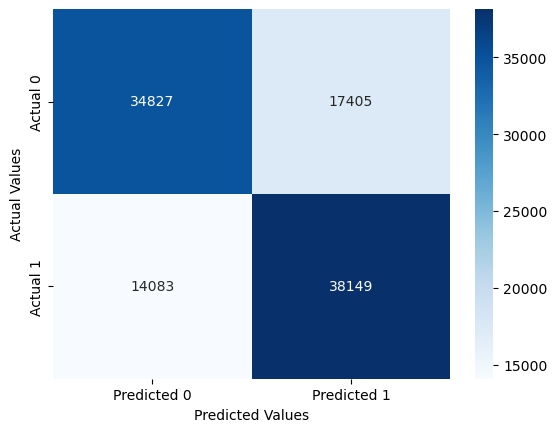

In [ ]:
confusion_matrix_data(test_dummy[preds], test_dummy.readmitted,log,cutoff=0.5)

Classification accuracy = 64.5% <br>
Precision = 11.3% <br>
TPR or Recall = 41.6% <br>
FNR = 58.4% <br>
FPR = 33.1% <br>
ROC-AUC = 54.3% <br>
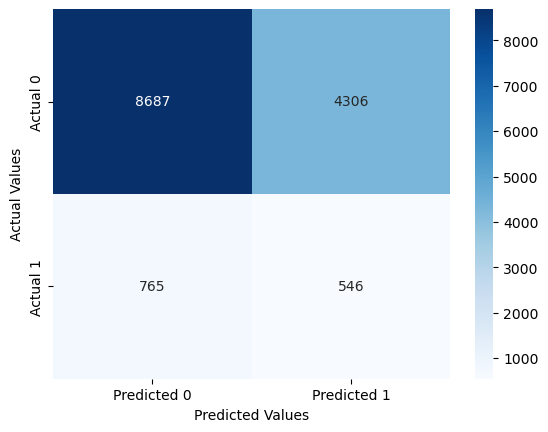

In [ ]:
# adding in variable interactions
from patsy import dmatrices

# creating the formula
f = 'num_lab_procedures'
for i in sig_preds[1:]:
    f = f + '+' + i
    
# adding interations on to the formula
f1 = f+'+change*diabetesMed+(age5+age15+age25+age35+age45+age55+age65+age75+age85+age95)*(time_in_hospital1+time_in_hospital2+time_in_hospital3+time_in_hospital4+time_in_hospital5+time_in_hospital6+time_in_hospital7+time_in_hospital8+time_in_hospital9+time_in_hospital10+time_in_hospital11+time_in_hospital12+time_in_hospital13+time_in_hospital14)+(age5+age15+age25+age35+age45+age55+age65+age75+age85+age95)*number_inpatient+change*(admission_type_id1+admission_type_id3+admission_type_id4+admission_type_id5)'

# creating features for sklearn w/ interactions using patsy
# test data
y0,X0 = dmatrices("readmitted~"+f1, train1_dummy)

# same thing here for train data
y1,X1 =  dmatrices("readmitted~"+f1, test_dummy)

# fit the logistic model
log.fit(X0,y0)

# get the name of the predictors
coef_names = X0.design_info.column_names

# get the list of coeffceints
coefs0 = log.coef_

# find the list of the predictors bwhose coefficient is non zero
sig_preds0 = np.array(coef_names)[np.where(coefs0 != 0)[1]]

In [ ]:
# Test Data Metrics
confusion_matrix_data(np.asarray(X0), train1_dummy.readmitted, log, cutoff=0.5)

Classification accuracy = 69.9% <br>
Precision = 68.7% <br>
TPR or Recall = 73.2% <br>
FNR = 26.8% <br>
FPR = 33.4% <br>
ROC-AUC = 69.9% <br>
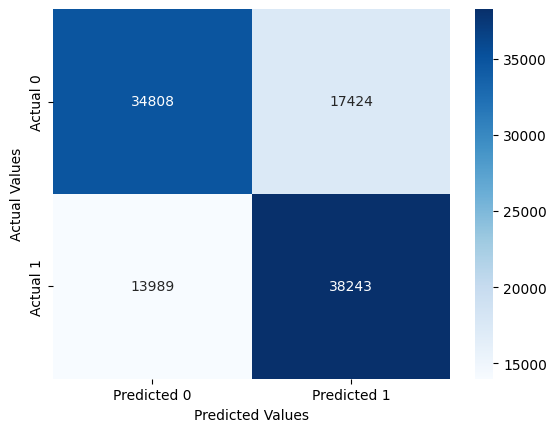

In [ ]:
# Test Data Accuracy
confusion_matrix_data(np.asarray(X1), test_dummy.readmitted, log, cutoff=0.5)

Classification accuracy = 64.6% <br>
Precision = 11.3% <br>
TPR or Recall = 41.8% <br>
FNR = 58.2% <br>
FPR = 33.1% <br>
ROC-AUC = 54.4% <br>
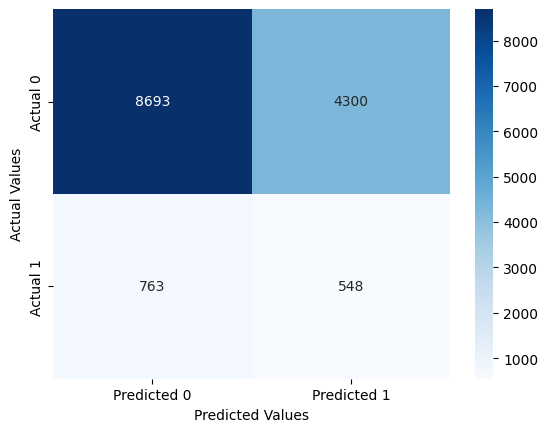

### Code fitting the final model

**NOTE:** Ultimately, after comparing the performance metrics of all the models we created and optimized, the **base model trained with SMOTENC data** had the best training and test performance based on the metrics we needed to optimize: (1) FNR, (2) recall, and (3) precision. 

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [38]:
# Final modeling 
final_model = sm.logit(formula = 'readmitted ~ time_in_hospital*age + num_of_changes + number_inpatient', data = train1).fit() #Developing logistic regression model
final_model .summary() 

Optimization terminated successfully.
         Current function value: 0.671192
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               104418
Model:                          Logit   Df Residuals:                   104412
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                 0.03168
Time:                        23:13:32   Log-Likelihood:                -70084.
converged:                       True   LL-Null:                       -72377.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.2629      0.057    -39.771      0.000      -2.374      -2.151
time_in_hospital         0.2012      0.011     17.591      0.000       0.179       0.224
age                      0.0339      0.001     40.978      0.000       0.032       0.035
time_in_hospital:age    -0.0028      0.000    -16.988      0.000      -0.003      -0.002
num_of_changes          -0.5269      0.015    -34.415      0.000      -0.557      -0.497
number_inpatient         0.1540      0.010     14.807      0.000       0.134       0.174
========================================================================================
"""

## Conclusions and Recommendations to stakeholder(s)
*By Lila Wells*

Calculating odds ratios

In [47]:
# Calculating the odds ratios for number_inpatient
odds_ratio = np.exp(final_model.params["number_inpatient"]) 

# Calculate the percentage increase in the odds
pct_increase = (odds_ratio - 1) * 100

print('The odds of readmission increase by', round(pct_increase, 2), '% with each additional inpatient hospital visit')


The odds of readmission increase by 16.65 % with each additional inpatient hospital visit


In [49]:
# Calculating the odds ratios for num_of_changes
odds_ratio = np.exp(final_model.params["num_of_changes"]) 

# Calculate the percentage increase in the odds
pct_increase = (odds_ratio - 1) * 100

print('The odds of readmission decrease by', round(abs(pct_increase), 2), '% with each additional medication change')


The odds of readmission decrease by 40.96 % with each additional medication change


In [51]:
# Calculating the odds ratios for num_of_changes
odds_ratio = np.exp(final_model.params["age"]) 

# Calculate the percentage increase in the odds
pct_increase = (odds_ratio - 1) * 100

print('The odds of readmission increase by', round(pct_increase, 2), '% with each additional added decade in patient age')


The odds of readmission increase by 3.44 % with each additional added decade in patient age


In [52]:
# Calculating the odds ratios for time_in_hospital
odds_ratio = np.exp(final_model.params["time_in_hospital"]) 

# Calculate the percentage increase in the odds
pct_increase = (odds_ratio - 1) * 100

print('The odds of readmission increases by', round(pct_increase, 2), '% with each additional day spent in the hospital during the patients initial hospital stay')


The odds of readmission increases by 22.29 % with each additional day spent in the hospital during the patients initial hospital stay


In [53]:
# Calculating the odds ratios for time_in_hospital:age
odds_ratio = np.exp(final_model.params["time_in_hospital:age"]) 

# Calculate the percentage increase in the odds
pct_increase = (odds_ratio - 1) * 100

print('The odds of readmission decreases by', round(abs(pct_increase), 2), '% with each additional day spent in the hospital during the patients initial hospital stay along with an increase in their age')


The odds of readmission decreases by 0.28 % with each additional day spent in the hospital during the patients initial hospital stay along with an increase in their age
